In [10]:
#cargar los datos
import pandas as pd 
df_train = pd.read_csv("train.csv")
df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

# 2. Arbol de regresion para predecir el precio de las casas usando todas las variables

In [11]:
from sklearn.metrics import r2_score
import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()

# Separar las variables independientes (X) y la variable dependiente (y)
X = df_numerico[variables_numericas].drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#modelo
modelo = DecisionTreeRegressor() 

# Entrenar el modelo
modelo.fit(X_train, y_train)


y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Analizar el modelo
print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train))
print("R^2 en prueba:", r2_score(y_test, y_pred_test))


Error cuadrático medio (MSE) en entrenamiento: 0.0
Error cuadrático medio (MSE) en prueba: 1962609927.9555554
R^2 en entrenamiento: 1.0
R^2 en prueba: 0.7511690047986308


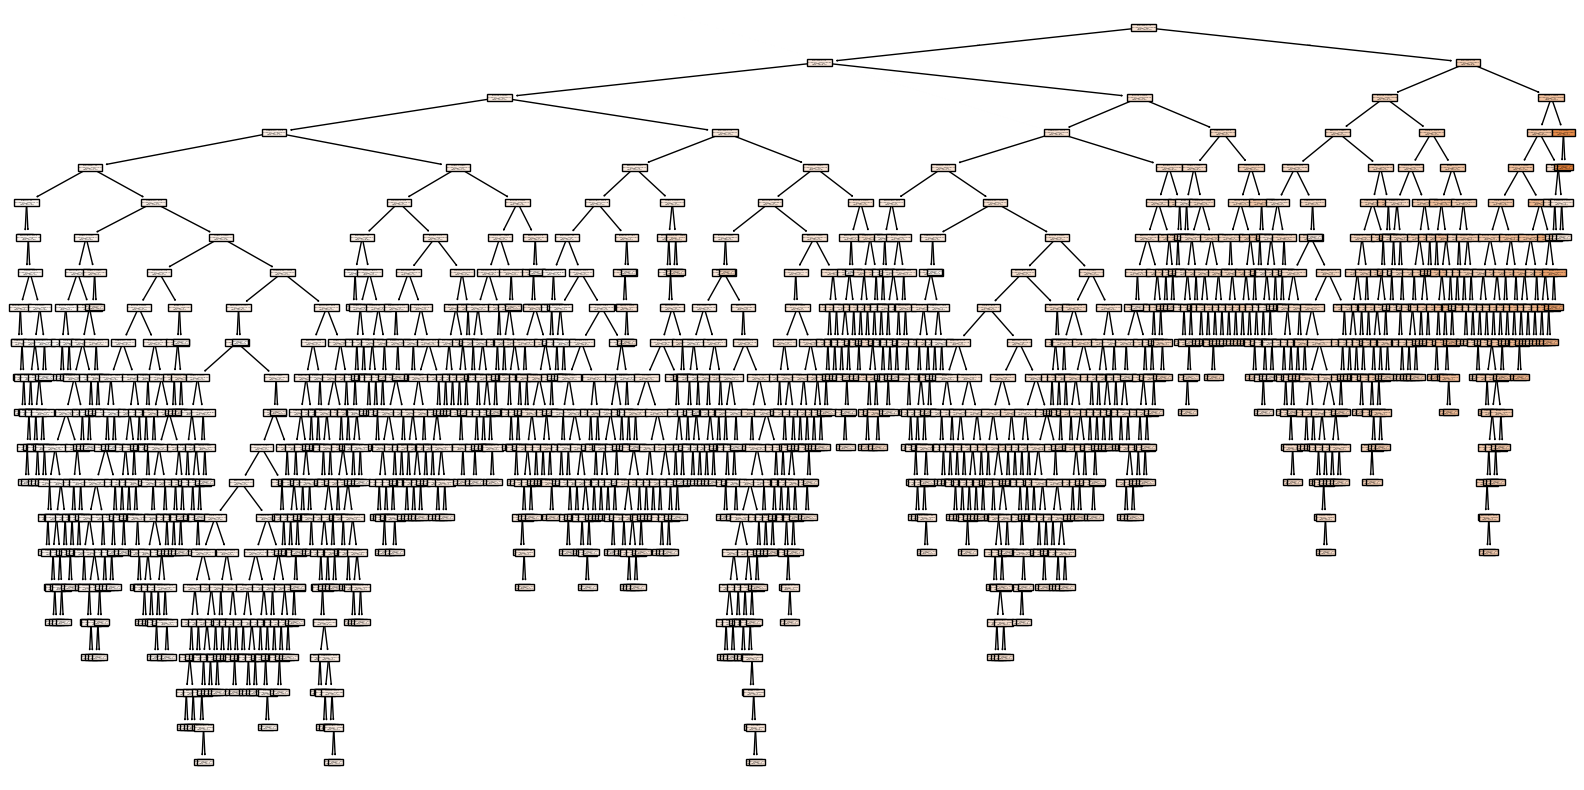

In [15]:
# Visualizar el árbol de regresión
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(modelo, filled=True, feature_names=X.columns)
plt.show()


# 3. Análisis del resultado

Al observar los resultados que el MSE es 0 y el R^2 es 1.  Mientras qwue el MSE en prueva es muy alto y el R^2 muy pequeño, lo que nos indica es que el modelo esta sobreajustado.
Por lo tanto, significa que el modelo ha aprendido bien los detalles y ruido del conjunto de entrenamiento, pero no generaliza bien los datos nuevos.

# 4. Haga, al menos, 3 modelos más, cambiando el parámetro de la profundidad del árbol. ¿Cuál es el mejor modelo para predecir el precio de las casas?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos
# df_train = pd.read_csv('path_to_your_data.csv')  # Asegúrate de cargar tus datos correctamente

df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()

# Separar las variables independientes (X) y la variable dependiente (y)
X = df_numerico[variables_numericas].drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor())
])

# Definir el grid de parámetros
param_grid = {
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__min_samples_split': [2, 5, 10]
}

# Crear el modelo GridSearchCV
modelo1 = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=2, cv=5, verbose=2, scoring='neg_mean_squared_error')

# Ajustar el modelo GridSearchCV
modelo1.fit(X_train, y_train)

#Resultados
print('-'*100)
print("Modelo 1")
print(f'Mejor configuracion del modelo 1: {modelo1.best_params_}')

#Entrenar el modelo con la mejor configuracion
best_model1 = modelo1.best_estimator_
best_model1.fit(X_train, y_train)

#predicciones
y_pred_train1 = best_model1.predict(X_train)
y_pred_test1 = best_model1.predict(X_test)

#aalizar el modelo

print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train1))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test1))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train1))
print("R^2 en prueba:", r2_score(y_test, y_pred_test1))

# Repetir para los otros dos modelos con diferentes configuraciones de hiperparámetros
param_grid2 = {
    'regressor__max_depth': [5, 10, 15],
    'regressor__min_samples_split': [2, 4, 6]
}

modelo2 = GridSearchCV(pipeline, param_grid=param_grid2, n_jobs=2, cv=5, verbose=2, scoring='neg_mean_squared_error')
modelo2.fit(X_train, y_train)
print('-'*100)
print("Modelo 2")
print(f'Mejor configuración del modelo 2: {modelo2.best_params_}')
best_model2 = modelo2.best_estimator_
best_model2.fit(X_train, y_train)
y_pred_train2 = best_model2.predict(X_train)
y_pred_test2 = best_model2.predict(X_test)

print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train2))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test2))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train2))
print("R^2 en prueba:", r2_score(y_test, y_pred_test2))

param_grid3 = {
    'regressor__max_depth': [10, 20, 30],
    'regressor__min_samples_split': [5, 10, 15]
}

modelo3 = GridSearchCV(pipeline, param_grid=param_grid3, n_jobs=2, cv=5, verbose=2, scoring='neg_mean_squared_error')
modelo3.fit(X_train, y_train)
print('-'*100)
print("Modelo 3")

print(f'Mejor configuración del modelo 3: {modelo3.best_params_}')
best_model3 = modelo3.best_estimator_
best_model3.fit(X_train, y_train)
y_pred_train3 = best_model3.predict(X_train)
y_pred_test3 = best_model3.predict(X_test)

print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train3))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test3))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train3))
print("R^2 en prueba:", r2_score(y_test, y_pred_test3))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------------------------------------------------------------------------------------------------
Modelo 1
Mejor configuracion del modelo 1: {'regressor__max_depth': 7, 'regressor__min_samples_split': 5}
Error cuadrático medio (MSE) en entrenamiento: 317451164.0812755
Error cuadrático medio (MSE) en prueba: 1666192363.3816075
R^2 en entrenamiento: 0.9519526986936055
R^2 en prueba: 0.7887505315898129
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------------------------------------------------------------------------------------------------
Modelo 2
Mejor configuración del modelo 2: {'regressor__max_depth': 15, 'regressor__min_samples_split': 4}
Error cuadrático medio (MSE) en entrenamiento: 37651575.75643069
Error cuadrático medio (MSE) en prueba: 1941456350.5178044
R^2 en entrenamiento: 0.9943013073829315
R^2 en prueba: 0.7538509772328517
Fitting 5 folds for each of 9 candidates, totalling 45 fits
------

Al observar las metricas de los 3 modelos, el error más bajo del MSE es el que tiene un mejor rendimiento, en este caso es el modelo 2. Mientras que con en el R^2 más alto indica mejor la variabilidad de los datos. En este caso, también es el modelo 2. Por lo tanto, el modelo 2 es el mejor modelo para predecir el precio de las casas.

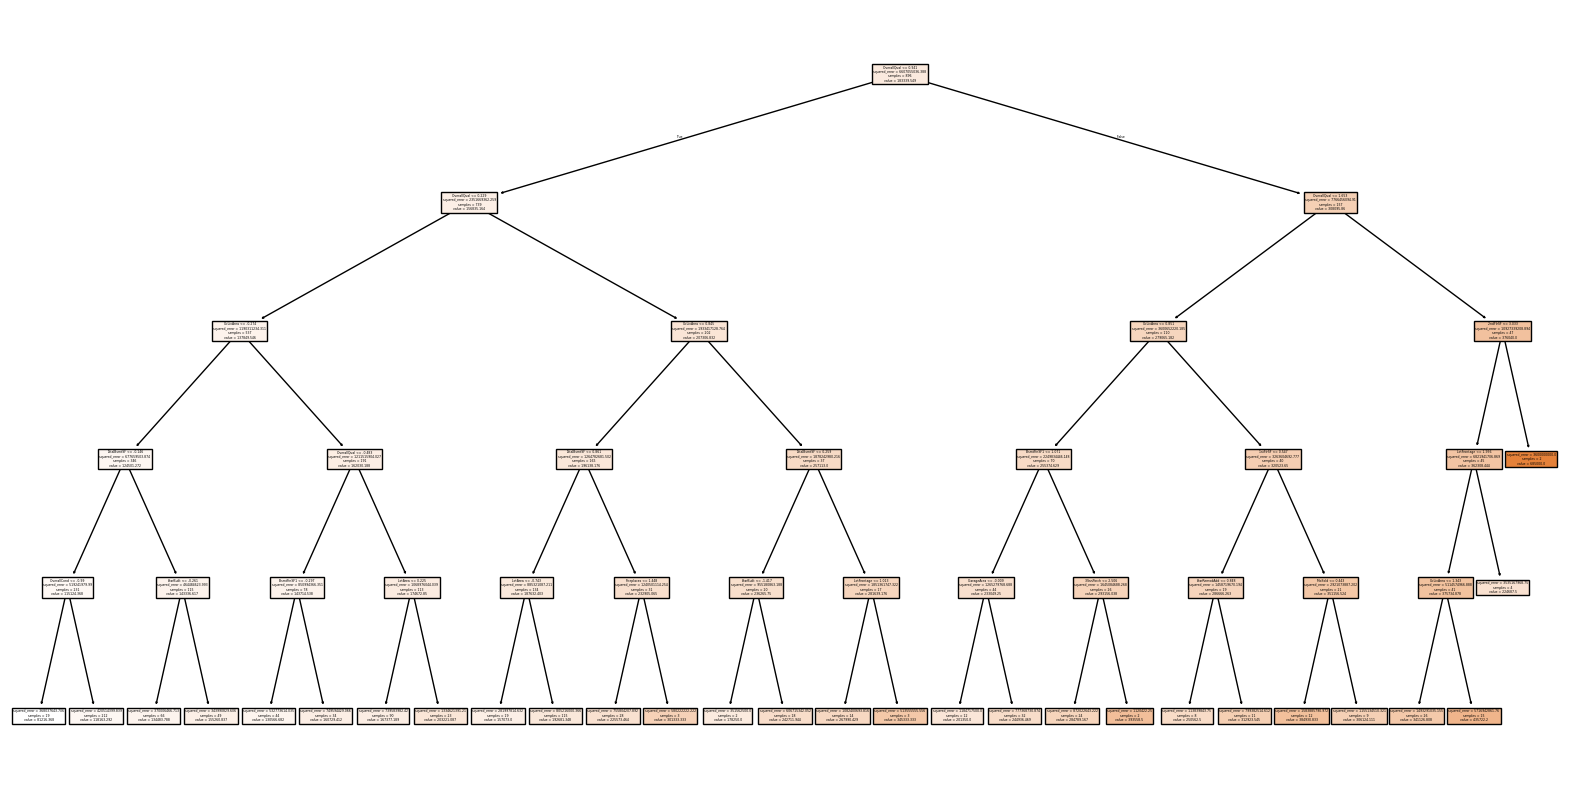

In [ ]:
# arbol para el mejor modelo
plt.figure(figsize=(20, 10))
plot_tree(best_model2.named_steps['regressor'], filled=True, feature_names=X.columns)
plt.show()


Al comparar entre los resultados de la regresion lineal y el árbol de regresión el MSE, tiene un mejor rendimiento el de la regresión lineal con un valor más bajo. Mientras que en el coeficiente ed determinación R^2 más alto indica una mejor variabilidad, en esta caso el de la regresión lineal es más alto. Y el RMSE, tiene un valor más bajo. Por lo tanto, el modelo con la regresion lineal con sobreajuste parece ser un mejor modelo.

# 6. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')

# Display the first few rows of the DataFrame to verify loading
df.head()
# Determine the thresholds for Economic, Intermediate, and Expensive houses
# Using quantiles to define the thresholds
q1 = df['price'].quantile(0.33)
q2 = df['price'].quantile(0.66)

print(f"Threshold for Economic houses: <= {q1}")
print(f"Threshold for Intermediate houses: > {q1} and <= {q2}")
print(f"Threshold for Expensive houses: > {q2}")

# Create a new column 'price_category' based on the thresholds
df['price_category'] = pd.cut(df['price'], bins=[-np.inf, q1, q2, np.inf], labels=['Economic', 'Intermediate', 'Expensive'])

# Display the first few rows to verify the new column
df.head()
# Count the number of houses in each price category
price_category_counts = df['price_category'].value_counts()

# Plot the distribution of price categories using a bar plot
plt.figure(figsize=(10, 6))
price_category_counts.plot(kind='bar', color=['green', 'blue', 'red'], alpha=0.7)
plt.title('Distribution of House Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Number of Houses')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Plot the distribution of price categories using a pie chart
plt.figure(figsize=(10, 6))
price_category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue', 'red'], startangle=140)
plt.title('Distribution of House Price Categories')
plt.ylabel('')
plt.show()

# 7. 

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the target for the test set
y_pred = clf.predict(X_test)

# Evaluate the model

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1:.2f}')

# Export the decision tree to a DOT format
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  

# Use graphviz to render the tree
graph = graphviz.Source(dot_data)  
graph.render("classification_tree")  # Save the tree as a PDF file
graph  # Display the tree in the notebook